In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv("train.csv", index_col = "PassengerId")

In [9]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [10]:
# data size 판단
print(train.shape)

(891, 11)


In [11]:
# check data type, NaN
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
# check simple statistics
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
%matplotlib inline

#  EDA
# 데이터간 관계를 파악

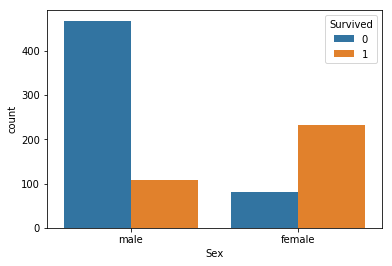

In [17]:
sns.countplot(data=train, x="Sex", hue="Survived")
# 0이 죽은거 , 1이 산거

In [18]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


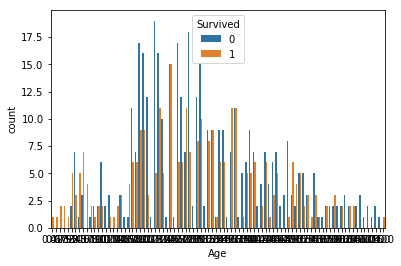

In [19]:
sns.countplot(data=train, x="Age", hue="Survived")

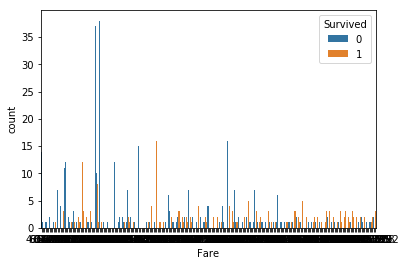

In [20]:
sns.countplot(data=train, x="Fare", hue="Survived")

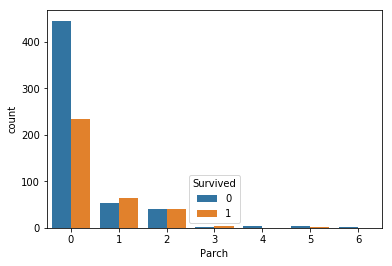

In [21]:
sns.countplot(data=train, x="Parch", hue="Survived")

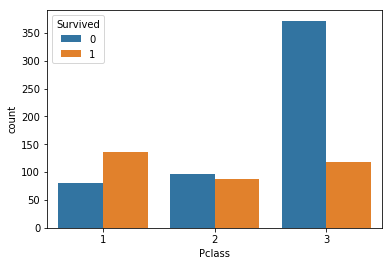

In [22]:
sns.countplot(data=train, x="Pclass", hue="Survived")

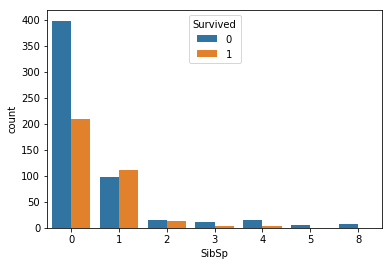

In [24]:
sns.countplot(data=train, x="SibSp", hue="Survived")

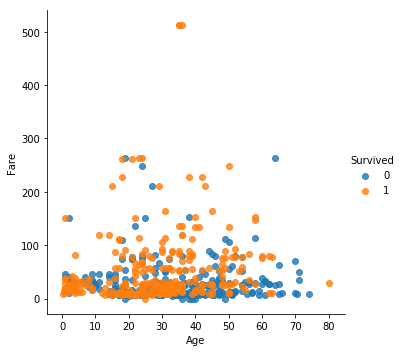

In [27]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [28]:
# 이상치 제거!
low_fare = train[train["Fare"] < 500]
train.shape, low_fare.shape # 3 행이 제거된 것을 확인!

((891, 11), (888, 11))

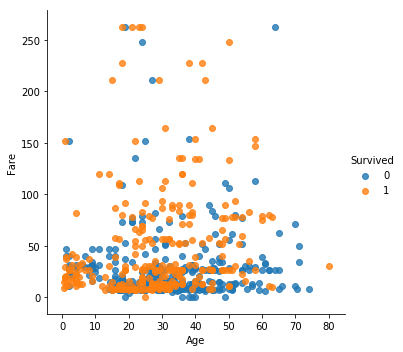

In [30]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [31]:
low_low_fare = train[train["Fare"] < 100]

In [33]:
train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

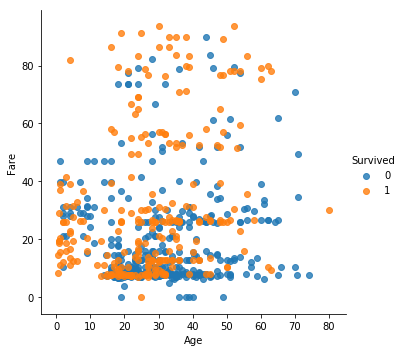

In [32]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

## SibSp(형제, 자매, 배우자), Parch(부모, 자식) => 파생 변수 FamilySize, FamilyType 생성!

In [34]:
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
print(train.shape)

(891, 12)


In [35]:
train[["SibSp", "Parch", "FamilySize"]].head()

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


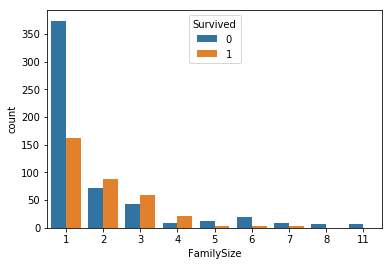

In [36]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [38]:
train.loc[train["FamilySize"]==1, "FamilyType"]="Single"

In [48]:
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

In [49]:
train.loc[train["FamilySize"] >= 5, "FamilyType"]="Big"

In [50]:
print(train.shape)

(891, 13)


In [52]:
train[["FamilySize", "FamilyType"]].head(10)

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


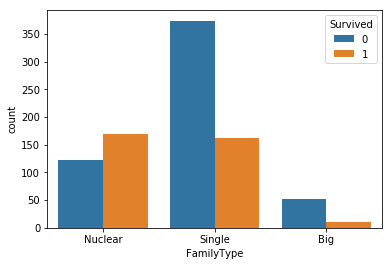

In [53]:
sns.countplot(data=train,x="FamilyType", hue="Survived")

In [54]:
pd.pivot_table(train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


In [55]:
# model에 돌릴 수 있게 0, 1로
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 14)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [63]:
# 이쯤에서 다시 정보확인 ㄱ
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      889 non-null object
FamilySize    891 non-null int64
FamilyType    891 non-null object
Sex_encode    891 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 144.4+ KB


In [ ]:
test

In [57]:
# test도 같은 과정 ㄱㄱ
test=pd.read_csv("test.csv", index_col="PassengerId")

In [59]:
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
test.loc[test["FamilySize"]==1, "FamilyType"]="Single"
test.loc[test["FamilySize"]==1, "FamilyType"]="Single"
test.loc[test["FamilySize"] >= 5, "FamilyType"]="Big"
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Ticket        418 non-null object
Fare          417 non-null float64
Cabin         91 non-null object
Embarked      418 non-null object
FamilySize    418 non-null int64
FamilyType    273 non-null object
Sex_encode    418 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 65.7+ KB
